In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df=pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
df.shape

(1025, 14)

In [4]:
df.loc[:, 'age'] += 15

In [5]:
data=df[df.age>65]

In [6]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,68,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,85,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,76,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,77,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,80,1,3,138,282,1,0,174,0,1.4,1,1,2,0
1017,68,1,0,123,282,0,1,95,1,2.0,1,2,3,0
1020,74,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,75,1,0,125,258,0,0,141,1,2.8,1,1,3,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       710 non-null    int64  
 1   sex       710 non-null    int64  
 2   cp        710 non-null    int64  
 3   trestbps  710 non-null    int64  
 4   chol      710 non-null    int64  
 5   fbs       710 non-null    int64  
 6   restecg   710 non-null    int64  
 7   thalach   710 non-null    int64  
 8   exang     710 non-null    int64  
 9   oldpeak   710 non-null    float64
 10  slope     710 non-null    int64  
 11  ca        710 non-null    int64  
 12  thal      710 non-null    int64  
 13  target    710 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 83.2 KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,710.0,74.385915,5.517795,66.0,70.0,73.5,78.0,92.0
sex,710.0,0.680282,0.466696,0.0,0.0,1.0,1.0,1.0
cp,710.0,0.890141,1.057868,0.0,0.0,0.0,2.0,3.0
trestbps,710.0,134.647887,18.569808,94.0,120.0,132.0,145.0,200.0
chol,710.0,252.830986,53.599014,126.0,216.0,246.0,283.0,564.0
fbs,710.0,0.187324,0.390446,0.0,0.0,0.0,0.0,1.0
restecg,710.0,0.490141,0.540896,0.0,0.0,0.0,1.0,2.0
thalach,710.0,144.242254,22.519583,71.0,130.0,147.0,161.0,195.0
exang,710.0,0.383099,0.486485,0.0,0.0,0.0,1.0,1.0
oldpeak,710.0,1.239859,1.216171,0.0,0.1,1.0,1.9,6.2


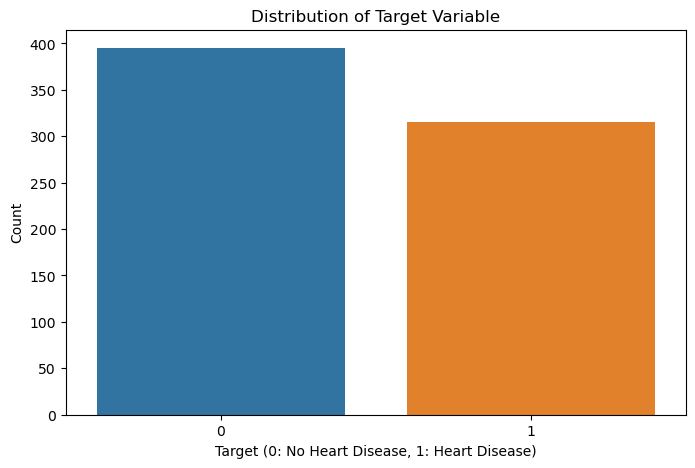

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(x="target", data=data)
plt.xlabel("Target (0: No Heart Disease, 1: Heart Disease)")
plt.ylabel("Count")
plt.title("Distribution of Target Variable")
plt.show()

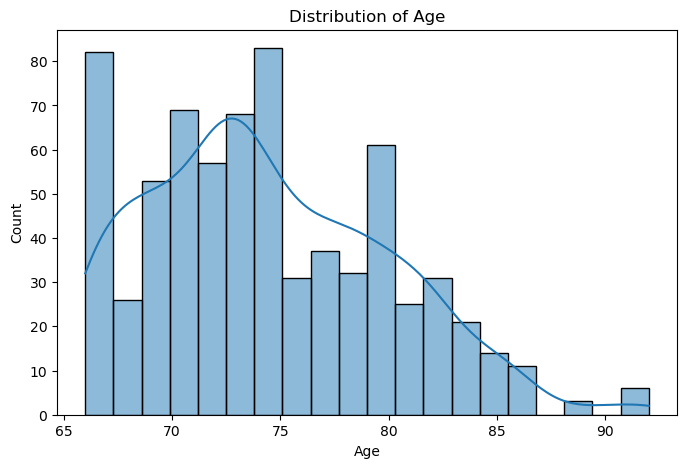

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(data["age"], bins=20, kde=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age")
plt.show()

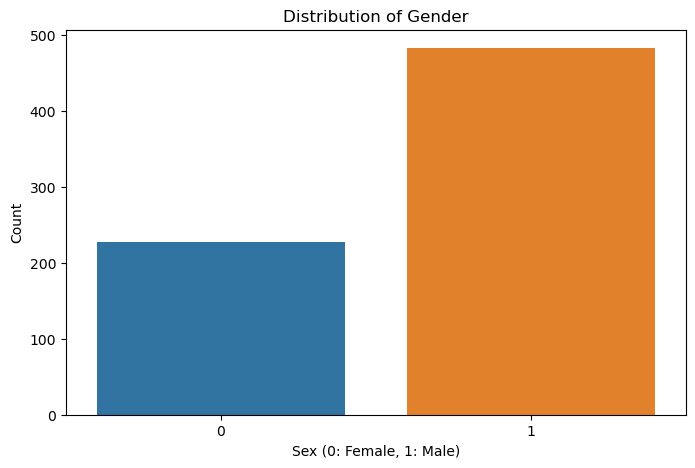

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x="sex", data=data)
plt.xlabel("Sex (0: Female, 1: Male)")
plt.ylabel("Count")
plt.title("Distribution of Gender")
plt.show()

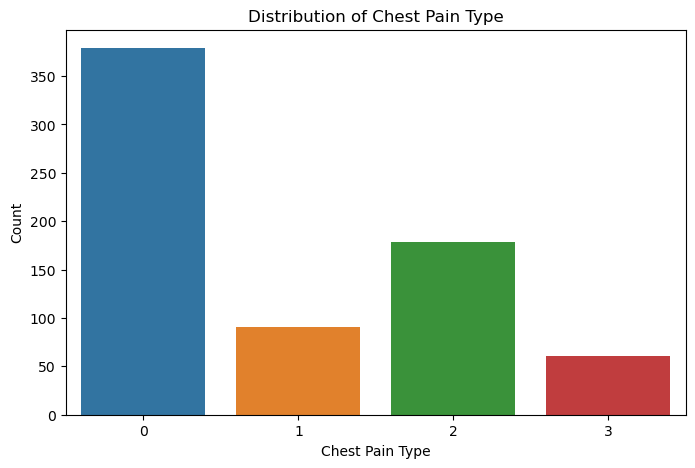

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x="cp", data=data)
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.title("Distribution of Chest Pain Type")
plt.show()

<Axes: >

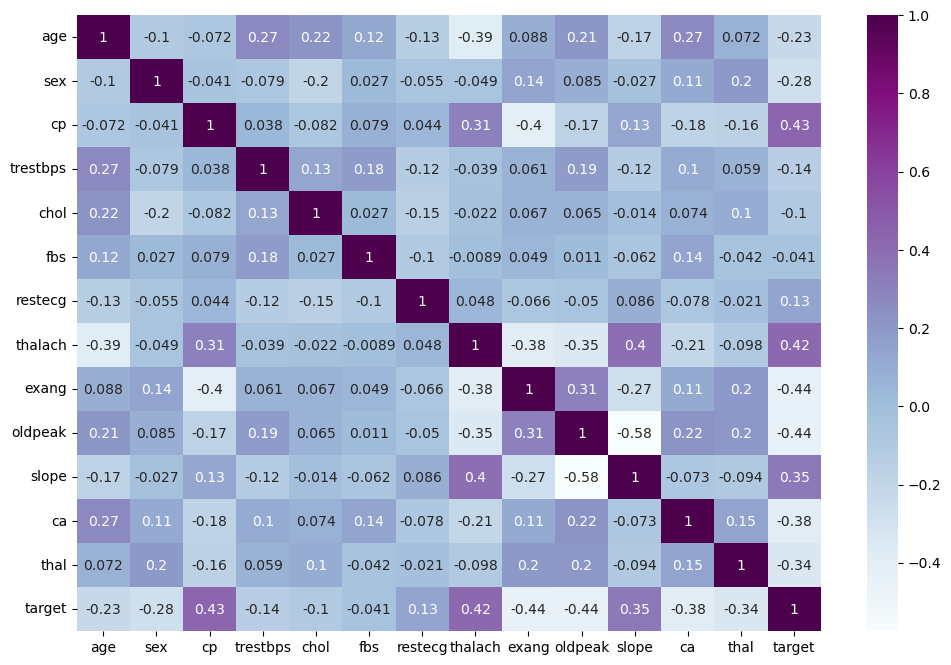

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='BuPu')

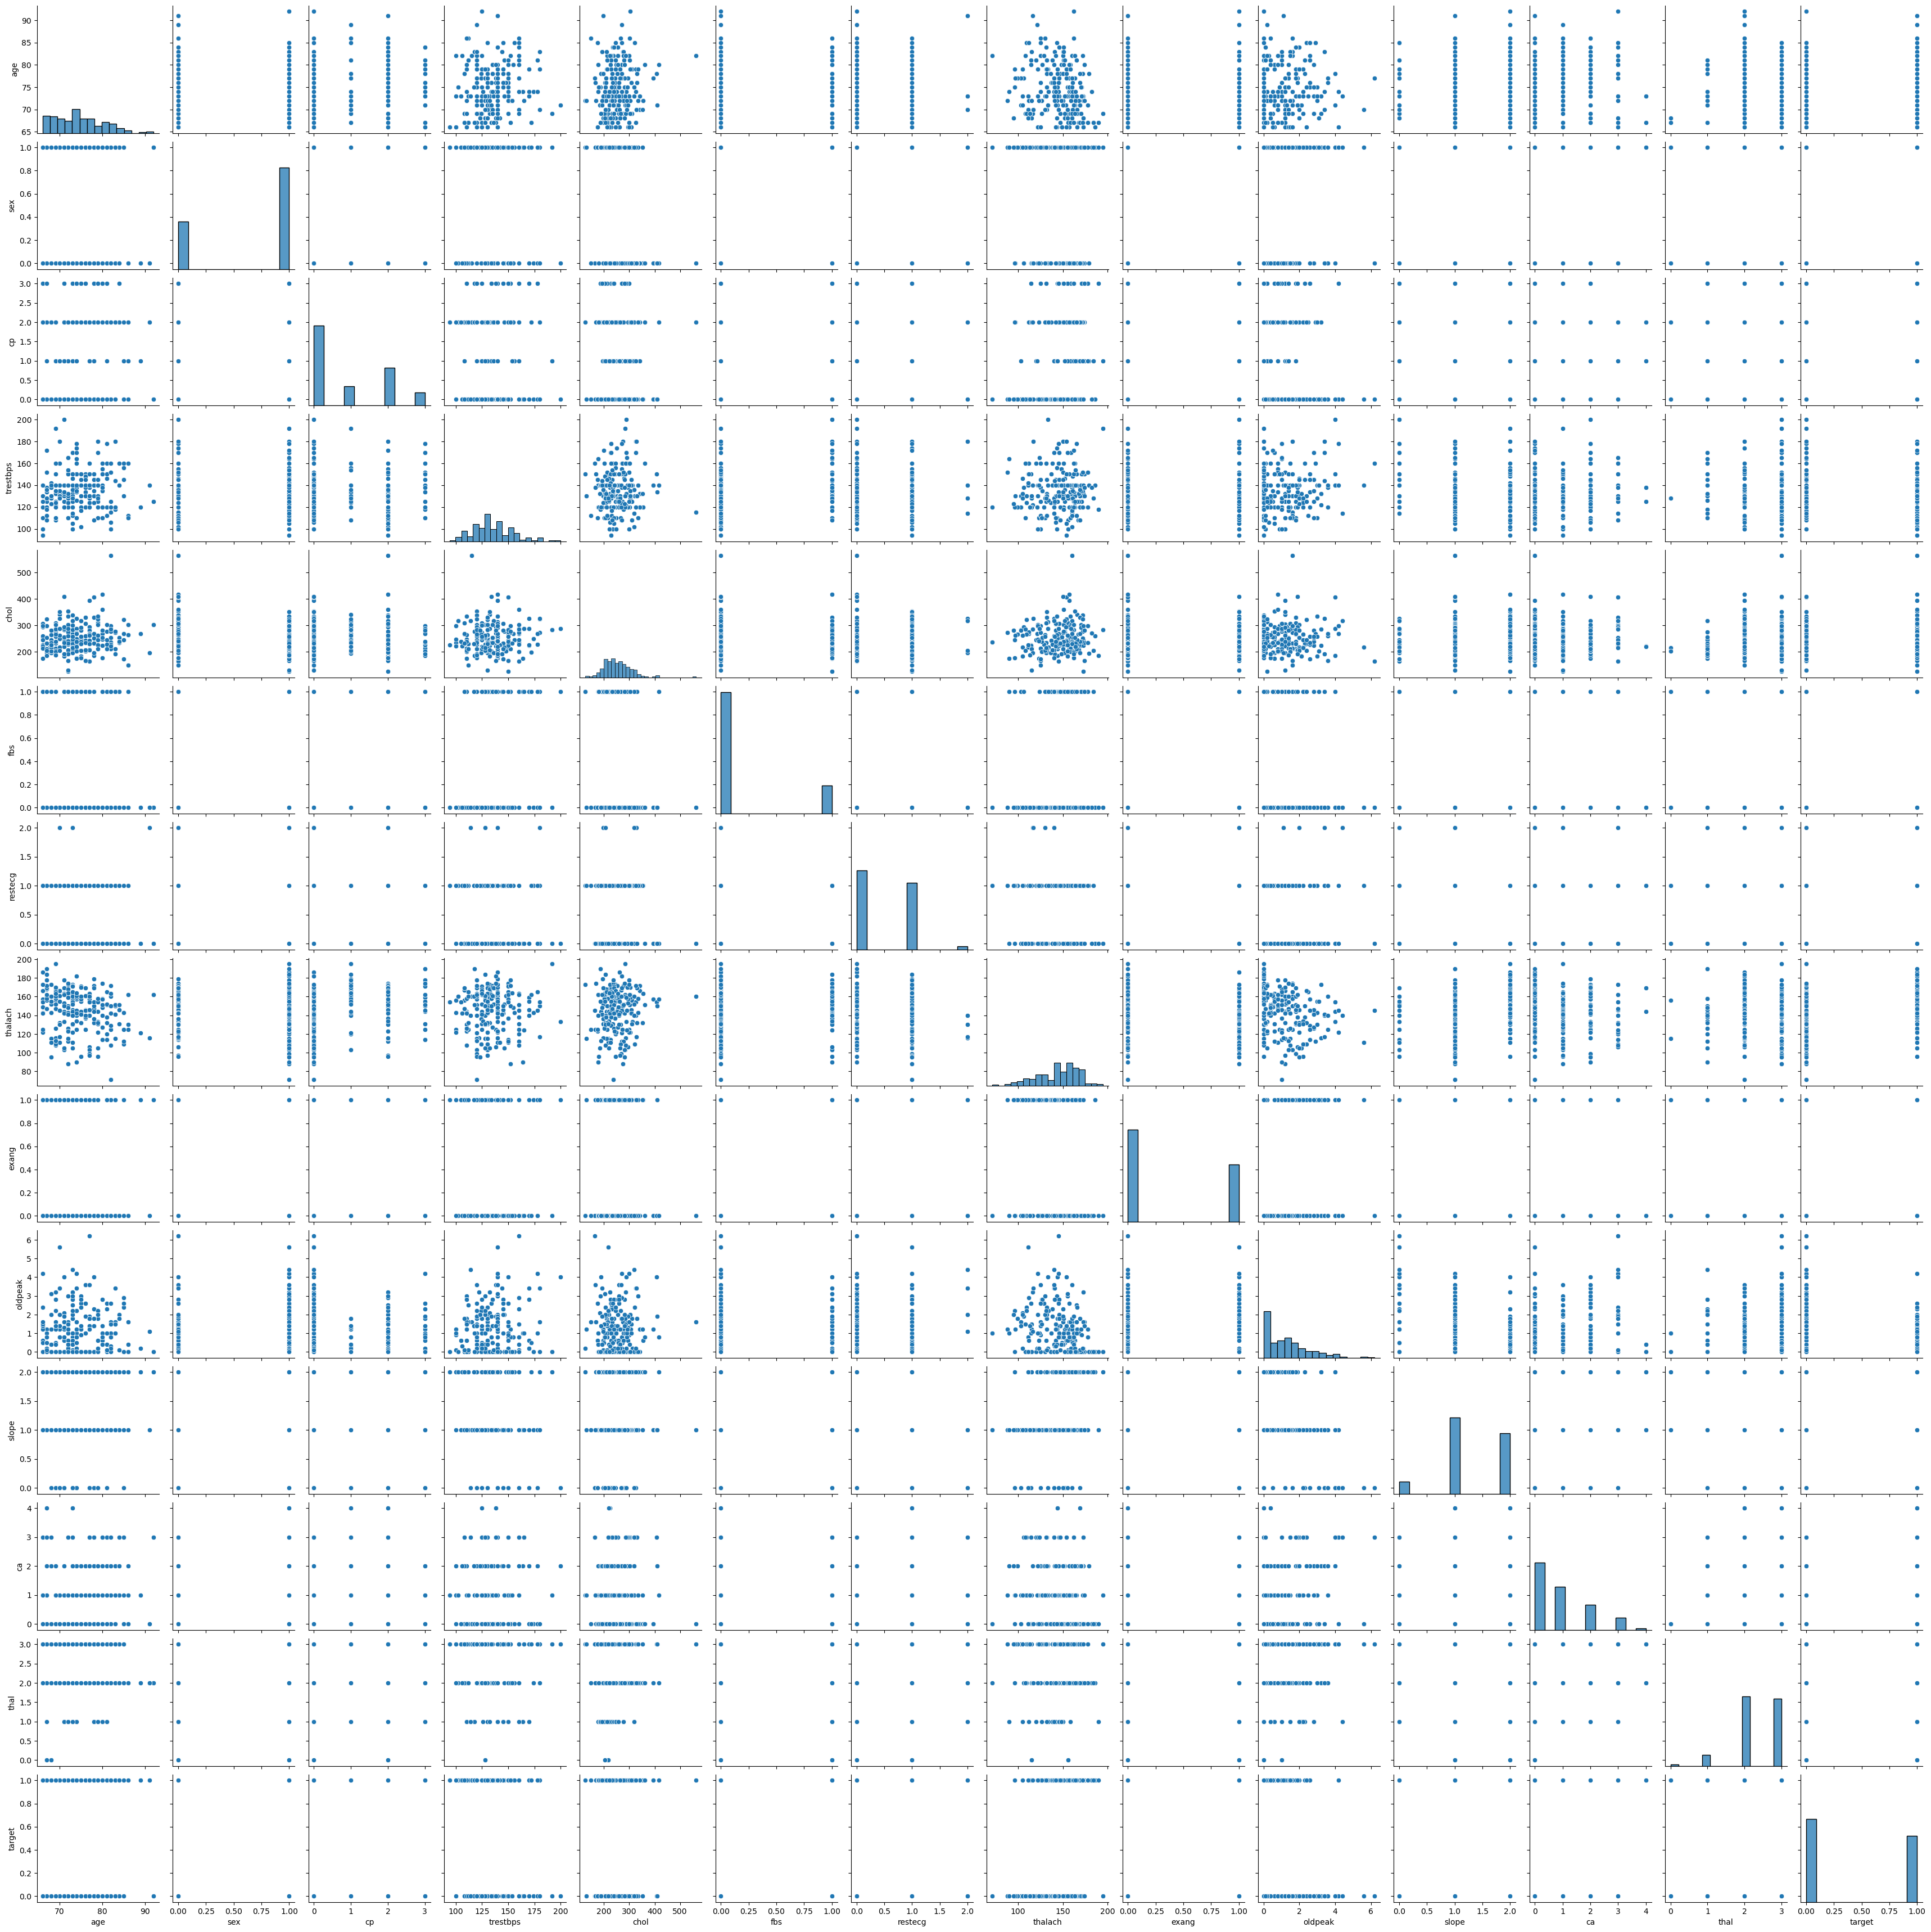

In [14]:
sns.pairplot(data = data)

In [15]:
X = data.drop("target", axis=1)
y = data["target"]

# Step 2: Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                  for i in range(X.shape[1])]

vif_data


,Feature,VIF
0,age,79.376863
1,sex,3.600206
2,cp,2.385612
3,trestbps,56.723956
4,chol,25.610378
5,fbs,1.373662
6,restecg,1.899394
7,thalach,45.997748
8,exang,2.222094
9,oldpeak,3.448437


In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=7)  # retain 95% of variance
X_pca = pca.fit_transform(X_scaled)



In [17]:
X_pca.shape

(710, 7)

In [18]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [19]:
if isinstance(X, pd.DataFrame):
    feature_names = X.columns.tolist()
else:
    # If you don't have access to column names, use indices
    feature_names = [f'Feature_{i}' for i in range(X.shape[1])]

# Get the eigenvectors (loadings)
components = pca.components_

# Get the indices of the features with the highest absolute loading for each component
top_features_indices = np.abs(components).argmax(axis=1)

# Get the names of the top features for each component
top_features_names = [feature_names[i] for i in top_features_indices]


In [20]:
top_features_names

['oldpeak', 'trestbps', 'fbs', 'thal', 'ca', 'fbs', 'restecg']

In [21]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)


Explained Variance Ratios: [0.19112273 0.11778935 0.10128547 0.09033562 0.08087038 0.07743981
 0.07405126]


In [45]:
samples_of_0 = data[data['target'] == 0].sample(n=5)

# Take out 2 samples of 1
samples_of_1 = data[data['target'] == 1].sample(n=5)

# Concatenate the samples
prototype = pd.concat([samples_of_0, samples_of_1])

# Drop these samples from the original DataFrame
df.drop(prototype.index, inplace=True)

In [46]:
prototype

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
476,72,1,0,165,289,1,0,124,0,1.0,1,3,3,0
295,82,1,0,100,299,0,0,125,1,0.9,1,2,2,0
997,69,1,0,120,188,0,1,113,0,1.4,1,1,3,0
767,83,1,0,144,193,1,1,141,0,3.4,1,2,3,0
929,75,1,0,130,206,0,0,132,1,2.4,1,2,3,0
432,75,0,2,102,318,0,1,160,0,0.0,2,1,2,1
120,69,1,1,108,309,0,1,156,0,0.0,2,0,3,1
385,66,1,2,110,175,0,1,123,0,0.6,2,0,2,1
795,77,1,1,128,208,1,0,140,0,0.0,2,0,2,1
158,82,0,2,115,564,0,0,160,0,1.6,1,0,3,1


# model building`

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

In [26]:
X_train.shape

(497, 7)

In [27]:
X_test.shape

(213, 7)

In [28]:
from collections import Counter
print(Counter(y))

Counter({0: 395, 1: 315})


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [30]:
Rf_classifier = RandomForestClassifier(n_estimators = 100)

Rf_classifier.fit(X_train, y_train)

y_pred_rf = Rf_classifier.predict(X_test)

accu_rf = accuracy_score(y_test, y_pred_rf)

# Print the prediction accuracy
print('Test Accuracy Random Forest Classifier :', accu_rf)

Test Accuracy Random Forest Classifier : 0.971830985915493


In [31]:
y_pred_rf = Rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
report = classification_report(y_test, y_pred_rf)


print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 0.971830985915493
Confusion Matrix:
 [[113   3]
 [  3  94]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       116
           1       0.97      0.97      0.97        97

    accuracy                           0.97       213
   macro avg       0.97      0.97      0.97       213
weighted avg       0.97      0.97      0.97       213



In [32]:
y_train_pred = Rf_classifier.predict(X_train)
y_test_pred = Rf_classifier.predict(X_test)

# Calculate accuracy on training and testing data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Accuracy on Training Set:", train_accuracy)
print("Accuracy on Testing Set:", test_accuracy)

Accuracy on Training Set: 1.0
Accuracy on Testing Set: 0.971830985915493


In [33]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2']
}
# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(Rf_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the GridSearchCV to your data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_


Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [34]:
best_params

{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [35]:
rf=RandomForestClassifier(n_estimators=100,
                                       max_depth=7,
                                       min_samples_split=10,
                                       min_samples_leaf=5,
                                       max_features='sqrt',
                                       random_state=42)

In [36]:
cv_scores = cross_val_score(rf, X_pca, y, cv=5, scoring="accuracy")

In [37]:
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.94366197 0.93661972 0.93661972 0.88732394 0.9084507 ]


In [38]:
print("Mean CV accuracy:", np.mean(cv_scores))
print("Standard deviation of CV accuracy:", np.std(cv_scores))

Mean CV accuracy: 0.9225352112676056
Standard deviation of CV accuracy: 0.021360212518455046


In [39]:
rf.fit(X_pca, y)

RandomForestClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [40]:
print("Feature importance:")
for i, importance in enumerate(rf.feature_importances_):
    print(f"{top_features_names[i]}: {importance}")

Feature importance:
oldpeak: 0.5109988553907093
trestbps: 0.061102359952833585
fbs: 0.06325946394505237
thal: 0.10452038490018876
ca: 0.1193435100637856
fbs: 0.09156281173244704
restecg: 0.04921261401498314


In [47]:
predictions = rf.predict(prototype.drop('target', axis=1)[top_features_names])
predictions

C:\Users\surem\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [48]:
for index, prediction in enumerate(predictions):
    print(f"Prediction for patient {index+1}:")
    if prediction == 1:
        print("The patient is at RISK of a HEART ATTACK.")
        print()
        print("Factors contributing to the risk:")
        for feature, value in prototype.drop('target', axis=1).iloc[index][top_features_names].items():
            print(f"- {feature}: {value}")
        print()
    else:
        print("The patient is not at risk of a heart attack.")
        print()



Prediction for patient 1:
The patient is not at risk of a heart attack.

Prediction for patient 2:
The patient is not at risk of a heart attack.

Prediction for patient 3:
The patient is not at risk of a heart attack.

Prediction for patient 4:
The patient is not at risk of a heart attack.

Prediction for patient 5:
The patient is not at risk of a heart attack.

Prediction for patient 6:
The patient is at RISK of a HEART ATTACK.

Factors contributing to the risk:
- oldpeak: 0.0
- trestbps: 102.0
- fbs: 0.0
- thal: 2.0
- ca: 1.0
- fbs: 0.0
- restecg: 1.0

Prediction for patient 7:
The patient is at RISK of a HEART ATTACK.

Factors contributing to the risk:
- oldpeak: 0.0
- trestbps: 108.0
- fbs: 0.0
- thal: 3.0
- ca: 0.0
- fbs: 0.0
- restecg: 1.0

Prediction for patient 8:
The patient is not at risk of a heart attack.

Prediction for patient 9:
The patient is at RISK of a HEART ATTACK.

Factors contributing to the risk:
- oldpeak: 0.0
- trestbps: 128.0
- fbs: 1.0
- thal: 2.0
- ca: 0.0
-